In [1]:
import sys
sys.path.append("../../")

In [19]:
import numpy as np
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence, whereSmallerOrEqual
from delay.value import calculateValue
import pandas as pd

In [6]:
N = 8
simulation = Simulation(FunctionType.HARD_INTERVAL, (2, 0), calculateValue, calc.linear(N=N, w=1))
simulation.setN(N)
simulation.setConv(0)
simulation.setDuration(1000000) # 10^6
simulation.setD(2)

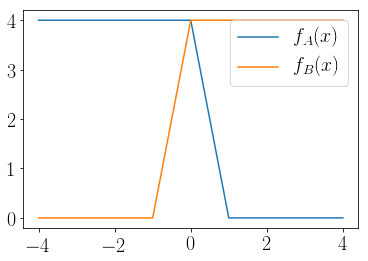

In [7]:
showIntervalFunctions(fA_HardInterval, fB_HardInterval, N, d=0)

[1, 2, 1, 2, 3, 4, 4.0, 3.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, -1.0, -2.0, -1.0, 0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 0.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 1.0, 0.0, -1.0, 0.0, -1.0, -2.0, -1.0, -2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -3.0, -2.0, -1.0, -2.0, -3.0, -2.0, -3.0, -2.0, -1.0, -2.0, -3.0, -2.0]


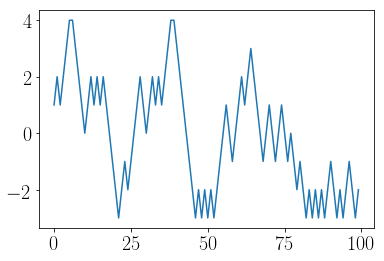

In [8]:
simulation.run()
seq = simulation.x[2:]
print(seq[:100])
plt.plot(seq[:100]);

In [9]:
def find(seq, pattern):
    res = 0
    for i in range(len(seq) - len(pattern) - 1):
        match = True
        for j in range(len(pattern)):
            if seq[i+j] != pattern[j]:
                match = False
        if match:
            res += 1
    return res

In [26]:
probs = []
for i in [-1, 1]:
    for j in [-1, 1]:
        a = find(seq, [2 + i + j, 2 + i, 2])
        probs.append(a)
        print('(%d, %d, 2): %d' % (2 + i + j, 2 + i, a))
s = sum(probs)
for i in range(len(probs)):
    probs[i] /= s

(0, 1, 2): 46507
(2, 1, 2): 15555
(2, 3, 2): 31017
(4, 3, 2): 15347


In [27]:
probs

[0.4289284857875417,
 0.14346190028222014,
 0.28606607271318685,
 0.14154354121705126]

In [28]:
(probs[0] + probs[1] + probs[2]) / 2 + probs[3]

0.5707717706085256

In [11]:
a = find(seq, [2, 1])
b = find(seq, [2, 3])

print(a, b)
print(a/(a+b))
print(4/7)

62063 46364
0.5723943298255969
0.5714285714285714
